In [21]:
"""
Goal :- To predict whether a person has diabetes (1) or does not have diabetes (0), 
using several medical and personal health measurements.

Why this data set :- Because the dataset helps predict diabetes, a major real-world health issue,
by analyzing medical factors like glucose level, BMI, and age

Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) 
are features that the model will use to predict Outcome.


# Meta-data of Data-set
#Total column - 9
#Total rows - 2000
#All are numerical columns
"""

'\nGoal :- To predict whether a person has diabetes (1) or does not have diabetes (0), \nusing several medical and personal health measurements.\n\nWhy this data set :- Because the dataset helps predict diabetes, a major real-world health issue,\nby analyzing medical factors like glucose level, BMI, and age\n\nPregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) \nare features that the model will use to predict Outcome.\n\n\n# Meta-data of Data-set\n#Total column - 9\n#Total rows - 2000\n#All are numerical columns\n'

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Loading the dataset
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [24]:
# Returns number of rows and columns of the dataset
df.shape

(2000, 9)

In [25]:
# Returns an object with all of the column headers 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
# Return Meta-data of Data-set
df.info() 

#Total column - 9
#Total rows - 2000
#All are numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [27]:
# Return statistical distribution of data-set

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [28]:
# Returns true for a column having null values, else false
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [29]:
# Checking Value Count of outcomes

df["Outcome"].value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [30]:
#Common issue: zeros in places where zero is physiologically impossible. 
#Convert zeros to np.nan for these columns then impute.

cols_zero_as_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_zero_as_missing] = df[cols_zero_as_missing].replace(0, np.nan)

In [31]:
df[cols_zero_as_missing].isnull().sum()

Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
dtype: int64

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >]], dtype=object)

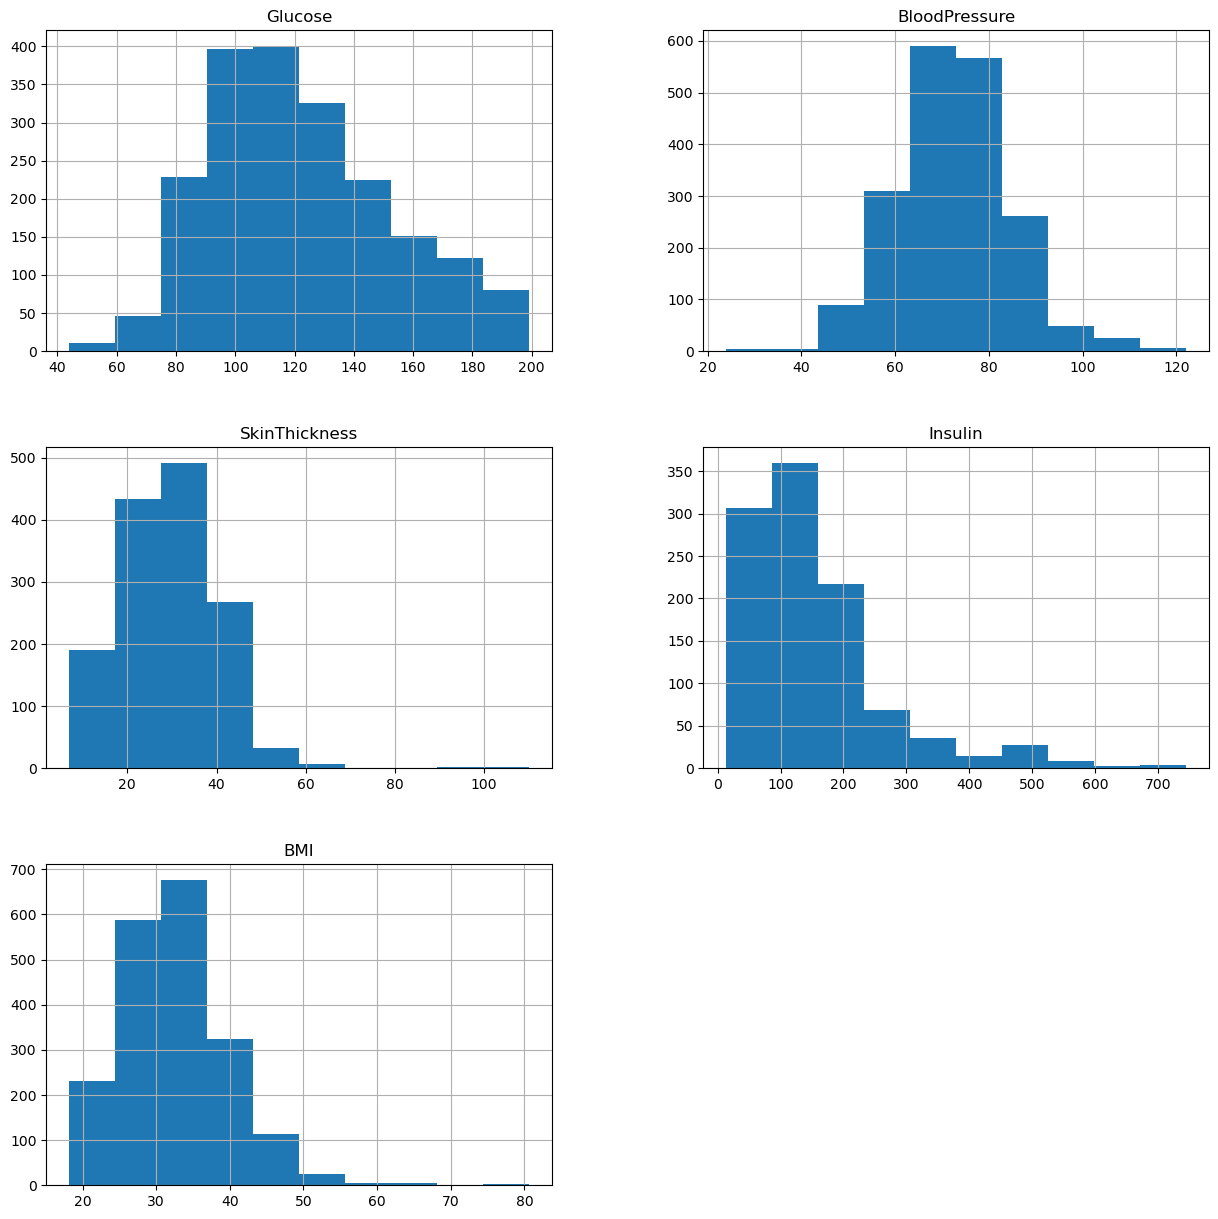

In [32]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
df[cols_zero_as_missing].hist(figsize = (15,15))

In [33]:
'''
# Mean is used when data is normally distributed (less skewed)
Glucose → mean
BloodPressure → mean

# Median is used when data is skewed (has outliers)
SkinThickness → median
Insulin → median
BMI → median
'''

'\n# Mean is used when data is normally distributed (less skewed)\nGlucose → mean\nBloodPressure → mean\n\n# Median is used when data is skewed (has outliers)\nSkinThickness → median\nInsulin → median\nBMI → median\n'

In [34]:
# Replacing NaN value by mean, median depending upon distribution
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

In [35]:
df.shape

(2000, 9)

In [36]:
# Step 3: Check missing values percentage
(df.isnull().sum()/len(df))*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [37]:
# Identify all numerical columns in your DataFrame
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Checking for Skewness
from scipy.stats import skew
for i in numerical_cols:
    print(f"{i} : {skew(df[i])}")


Pregnancies : 0.9816286665825157
Glucose : 0.5125888864042195
BloodPressure : 0.21489481508832767
SkinThickness : 1.3107277421436685
Insulin : 2.973312283298848
BMI : 0.9363408225826376
DiabetesPedigreeFunction : 1.8106196267530008
Age : 1.180381087900115
Outcome : 0.6661332052171766


In [38]:
'''
From a domain perspective, features like Insulin and Age are naturally skewed due to real human variations,
so keeping them unchanged preserves the medical authenticity of the data.
'''

'\nFrom a domain perspective, features like Insulin and Age are naturally skewed due to real human variations,\nso keeping them unchanged preserves the medical authenticity of the data.\n'

In [39]:
# Separating the dataset into features (independent variables) and target (dependent variable)
features = df.drop('Outcome', axis=1)
target = df['Outcome']

In [40]:
features.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [41]:
# We use StandardScaler to put all features on the same scale (mean 0, std 1)
# so the model treats them equally and learns better.

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
features.iloc[:]=scaler.fit_transform(features.iloc[:])
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.515394,0.524960,-0.870852,0.631010,-0.177601,0.132630,-1.063246,1.180424
1,-1.120495,-1.244054,0.803273,0.192542,-0.189864,0.772550,-0.735551,-0.856326
2,-1.120495,0.754277,0.000000,-0.026692,-0.177601,1.607229,0.491759,-0.177409
3,-1.120495,0.426682,-0.368614,1.398329,1.343080,1.342914,-0.327478,-0.771462
4,-0.817945,0.557720,-0.870852,1.288712,4.163696,1.120333,0.201161,-1.026055


In [42]:
# Train test data splitting

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.20, random_state=0)

In [43]:
print(xtrain.shape,ytrain.shape)

(1600, 8) (1600,)


In [44]:
print(xtest.shape,ytest.shape)

(400, 8) (400,)


In [45]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [46]:
# Creating a function to calculate best model for this problem
def find_best_model(features, target):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(features, target)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(xtrain, ytrain)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.758750
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.895625
2,random_forest,{'n_estimators': 20},0.955000
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.863125


In [47]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), xtrain, ytrain, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


In [48]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=20, random_state=0)

In [51]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
ypred = classifier.predict(xtest)
cm = confusion_matrix(ytest, ypred)
cm

array([[269,   3],
       [  1, 127]])

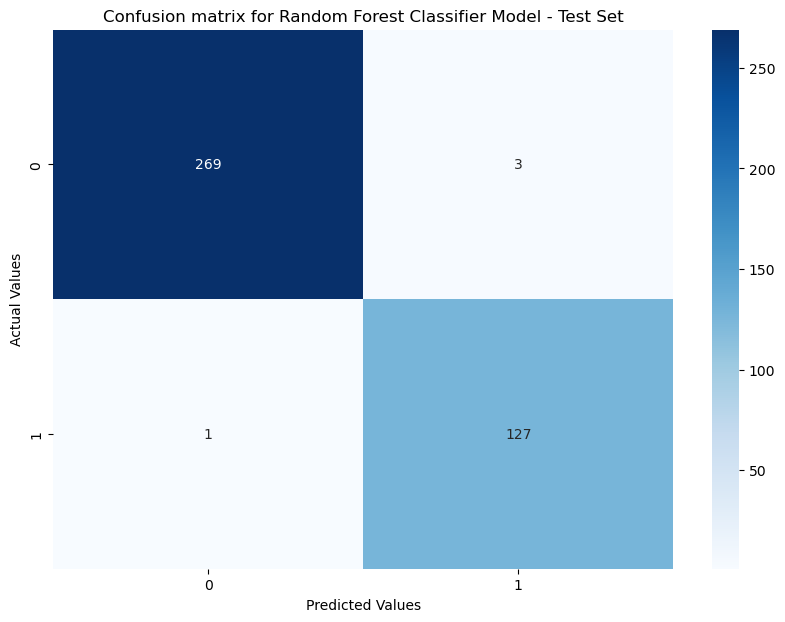

In [52]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [53]:
# Accuracy Score
score = round(accuracy_score(ytest, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 99.0%


In [54]:
# Classification Report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       272
           1       0.98      0.99      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [55]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(xtrain)
cm = confusion_matrix(ytrain, y_train_pred)
cm

array([[1043,    1],
       [   1,  555]])

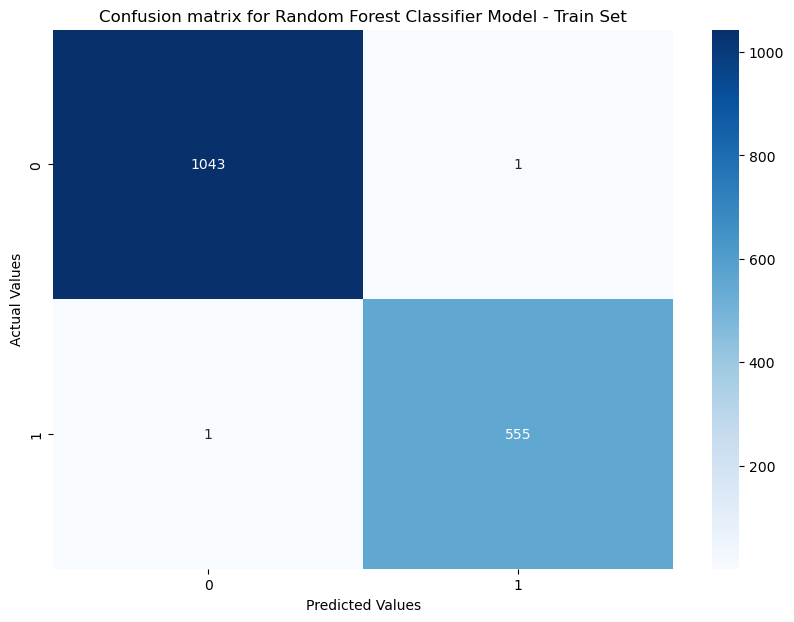

In [56]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [57]:
# Accuracy Score
score = round(accuracy_score(ytrain, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 99.88%


In [58]:
# Classification Report
print(classification_report(ytrain, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [59]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DiabetesPedigreeFunction)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = scaler.transform(x)

    return classifier.predict(x)

In [60]:
# Prediction
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [61]:
from sklearn.svm import SVC
import pickle

#  Create and train the model
svc = SVC(kernel='linear', probability=True, random_state=42)
svc.fit(xtrain, ytrain)

#  Save the trained model
with open("model.pkl", "wb") as f:
    pickle.dump(svc, f)

print("✅ Model saved successfully as model.pkl")


✅ Model saved successfully as model.pkl
